## 00. Coding Best Practices

In [1]:
# Basic Libraries
import os # file management 
import pandas as pd # data manipulatioN
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # advanced statistical visualization
import warnings # warning messages management

# Machine Learning
from sklearn.preprocessing import LabelEncoder, MinMaxScaler # label encoding and feature scaling
from sklearn.model_selection import train_test_split # splitting data into train/test sets
from sklearn.linear_model import ElasticNet # regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # model evaluation metrics

# Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
# Basic functions
def data_info(): # improved data.info()
    print(f"The DataFrame shape is {data.shape}.")
    print()
    print("The DataFrame data types are:")
    print(data.dtypes.value_counts().tolist())
    print(data.dtypes.value_counts().index.tolist())
    print()
    print("DataFrame random row sample and full columns:")
    return data.sample(5)

def clean_columns(): # Standardizes the column name, returns the columns
    data_copy.columns = [i.lower().replace(' ', '_') for i in data_copy.columns]
    return data_copy.sample(0)
       
# Specific functions for this dataset
def convert_value(value): # function to convert value to unified format
    try:
        if isinstance(value, float):
            return value
        elif value.endswith('K'):
            return float(value[1:-1]) * 1000
        elif value.endswith('M'):
            return float(value[1:-1]) * 1000000
        else:
            return float(value)
    except ValueError:
        return None

## 01 - Getting the Data

In [3]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. iron-activity/project-mbappe", "fifa21_male2.csv")
data = pd.read_csv(file_path)
data_info()

The DataFrame shape is (17125, 107).

The DataFrame data types are:
[52, 45, 10]
[dtype('O'), dtype('int64'), dtype('float64')]

DataFrame random row sample and full columns:


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
7712,224677,Bi Jinhao,29,61,China PR,Shanghai Greenland Shenhua FC,61,CB,CB,https://cdn.sofifa.com/players/224/677/20_120.png,https://cdn.sofifa.com/teams/110955/light_60.png,https://cdn.sofifa.com/flags/cn.png,61,Shanghai Greenland Shenhua FC 2016 ~ 2022,"6'3""",165lbs,Right,0,"Jan 15, 2016",NaN,€210K,€3K,€326K,2016 ~ 2022,278,49,52,58,58,61.0,265,54,49.0,50,56,56,293,55,59,51.0,63,65.0,322,62,64.0,67,78,51,285,59,61.0,59.0,57.0,49,58.0,176,61,56,59.0,53,12,9,15,7,10,1672,351,3 ★,2★,Medium,Medium,1 ★,57,54,55,55,59,71,3,58+2,58+2,58+2,55+0,57+0,57+0,57+0,55+0,56+2,56+2,56+2,56+2,58+2,58+2,58+2,56+2,58+2,60+1,60+1,60+1,58+2,59+2,61+0,61+0,61+0,59+2,16+2,Male
9215,231301,E. Saavedra,24,69,Bolivia,Bolivia,69,RB,RB RM RW,https://cdn.sofifa.com/players/231/301/20_120.png,https://cdn.sofifa.com/teams/111451/light_60.png,https://cdn.sofifa.com/flags/bo.png,76,Club Bolívar 2014 ~ 2021,"5'8""",146lbs,Right,7,"Jan 1, 2014",NaN,€1.3M,€500,€3.1M,Club Bolívar 2014 ~ 2021,264,65,54,49,59,37.0,266,60,53.0,59,29,65,348,75,71,66.0,58,78.0,303,56,69.0,89,40,49,239,40,66.0,53.0,40.0,40,51.0,198,67,65,66.0,43,6,12,6,13,6,1661,358,3 ★,3★,High,Medium,1 ★,73,52,52,63,64,54,5,56+2,56+2,56+2,60+0,58+0,58+0,58+0,60+0,56+2,56+2,56+2,60+2,55+2,55+2,55+2,60+2,67+2,59+2,59+2,59+2,67+2,67+2,59+2,59+2,59+2,67+2,14+2,Male
6140,214948,S. Schonlau,25,71,Germany,SC Paderborn 07,73,CB,CB,https://cdn.sofifa.com/players/214/948/20_120.png,https://cdn.sofifa.com/teams/10030/light_60.png,https://cdn.sofifa.com/flags/de.png,75,SC Paderborn 07 2013 ~ 2021,"6'1""",170lbs,Right,4,"Jul 1, 2013",NaN,€2.7M,€12K,€4.5M,2013 ~ 2021,245,40,39,67,68,31.0,242,50,34.0,42,58,58,317,61,56,65.0,72,63.0,306,48,78.0,69,74,37,275,68,70.0,44.0,44.0,49,67.0,224,73,77,74.0,56,15,13,11,8,9,1665,353,3 ★,2★,Medium,Medium,1 ★,58,41,53,56,73,72,9,53+2,53+2,53+2,52+0,53+0,53+0,53+0,52+0,54+2,54+2,54+2,54+2,59+2,59+2,59+2,54+2,65+2,68+2,68+2,68+2,65+2,66+2,71+2,71+2,71+2,66+2,18+2,Male
11294,239101,T. Brinkmann,24,59,Germany,SC Verl,59,GK,GK,https://cdn.sofifa.com/players/239/101/20_120.png,https://cdn.sofifa.com/teams/110501/light_60.png,https://cdn.sofifa.com/flags/de.png,65,SC Verl 2020 ~ 2021,"6'6""",207lbs,Right,6,"Jul 31, 2020",NaN,€160K,€500,€264K,2020 ~ 2021,61,11,8,10,25,7.0,65,6,14.0,14,21,10,135,21,25,15.0,54,20.0,205,46,47.0,28,78,6,72,16,12.0,5.0,22.0,17,33.0,35,10,14,11.0,296,60,62,61,56,57,869,319,2 ★,1★,Medium,Medium,1 ★,60,62,61,57,23,56,5,21+2,21+2,21+2,16+0,18+0,18+0,18+0,16+0,17+2,17+2,17+2,18+2,20+2,20+2,20+2,18+2,19+2,22+2,22+2,22+2,19+2,19+2,23+2,23+2,23+2,19+2,58+2,Male
14116,247869,M. Glushenkov,20,64,Russia,Spartak Moscow,65,LM,RW,https://cdn.sofifa.com/players/247/869/20_120.png,https://cdn.sofifa.com/teams/100767/light_60.png,https://cdn.sofifa.com/flags/ru.png,79,Spartak Moscow 2019 ~ 2023,"5'10""",152lbs,Left,15,"Jan 12, 2019",NaN,€1M,€9K,€2.2M,2019 ~ 2023,291,60,64,41,61,65.0,285,64,57.0,46,51,67,343,71,77,64.0,61,70.0,244,67,41.0,44,45,47,227,32,19.0,62.0,59.0,55,49.0,84,29,28,27.0,50,10,7,10,12,11,1524,328,3 ★,2★,High,Medium,1 ★,74,61,58,65,28,42,9,61+2,61+2,61+2,64+0,63+0,63+0,63+0,64+0,62+2,62+2,62+2,63+2,55+2,55+2,55+2,63+2,47+2,43+2,43+2,43+2,47+2,45+2,36+2,36+2,36+2,45+2,16+2,Male

<div class="alert alert-block alert-info">
    
**First impression:**
    
_____________

The following dataset is a collection of **one-year** 17.125 player information distributed among 107 different columns. The majority of our data types are mostly **numericals** (52 object / 45 integers / 10 floats).

Our **project goal** is to identify players who have the potential to become **the next Mbappé**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we decide to proceed with the following **strategy**:

1. The **target** of our dataset will be `OVA` (overall score), which is a summary of a player's performance and potential. 
1. The majority of the data types are **numericals**, so we will work with that.
3. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________
</div>

## 02 - Cleaning the Data

In [4]:
data_copy = data.copy() # as best practices, we do first a copy of our dataframe

In [5]:
clean_columns() # Standardizes the column name from data_copy

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender


### Encoding
<div class="alert alert-block alert-info">
    
* To **clean** it in less steps, we will split the dataset to get all numericals.
* For that, firstly we need to encode some columns considered as **categoricals** that are actually **numericals**. (`height`, `weight` and `sm` (skill moves).
* For this version we will not encode `hits` (it represents player popularity)
</div>

In [6]:
# Applying lambda to:

# Height data from feet and inches to centimeters
data_copy['h_cm'] = data_copy['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1].replace('"', ''))*2.54)

# Weight data from pounds to kilograms
data_copy['w_kg'] = data_copy['weight'].apply(lambda x: int(x[:-3]) / 2.2046)

# Skilled_moves
data_copy['sm'] = data_copy['sm'].apply(lambda x: int(x[0]) if isinstance(x, str) else x)

# Visualizing the changes
data_encoded = data_copy[['h_cm', 'w_kg', 'sm']]
data_encoded.head(5)

,h_cm,w_kg,sm
0,182.88,82.101061,2
1,177.80,64.864374,3
2,175.26,73.029121,4
3,180.34,74.843509,1
4,170.18,68.039554,4


### Further Encoding

<div class="alert alert-block alert-warning">

* `a/w` stands for Attacking Work Rate
* `d/w` stands for Defensive Work Rate

**AKA.** Tendency to a player towards attack or defense.
</div>

In [7]:
data_f_encoding = data_copy[['a/w', 'd/w']]
data_f_encoding.head(5)

,a/w,d/w
0,Medium,High
1,Medium,Medium
2,Medium,Low
3,NaN,NaN
4,High,Medium


In [8]:
# Initialize the LabelEncoder object from sklearn
le = LabelEncoder()

# Fit and transform the data frame column
data_copy['a_wr'] = le.fit_transform(data_copy['a/w'])
data_copy['d_wr'] = le.fit_transform(data_copy['d/w'])

# Visualizing the changes
data_encoded_f = data_copy[['a_wr', 'd_wr']]
data_comparision_2 = pd.concat([data_f_encoding, data_encoded_f], axis=1)
data_comparision_2.head(5)

,a/w,d/w,a_wr,d_wr
0,Medium,High,2,0
1,Medium,Medium,2,2
2,Medium,Low,2,1
3,NaN,NaN,3,3
4,High,Medium,0,2


### Selecting numericals / Dealing with Null values

In [9]:
# Create a new dataframe with only the numerical columns using select_dtypes
X_N = data_copy.select_dtypes(np.number).fillna(0) # we also deal with NaN values
X_N.head(10)

,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,sm,pac,sho,pas,dri,def,phy,h_cm,w_kg,a_wr,d_wr
0,2,33,69,71,69,0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,0.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,2,71,59,70,71,68,69,182.88,82.101061,2,0
1,16,37,71,70,71,0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,3,53,69,73,69,58,63,177.80,64.864374,2,2
2,27,33,71,71,71,0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,0.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,45,68,76,77,36,52,175.26,73.029121,2,1
3,36,36,68,70,82,14,264,54,70,60,80,0.0,255,68,0.0,46,64,77,176,59,62,0.0,55,0.0,239,63,0.0,51,66,59,271,59,70.0,72.0,0.0,70,0.0,75,34,41,0.0,68,5,21,64,21,21,1348,369,1,61,66,66,69,47,60,180.34,74.843509,3,3
4,41,36,81,82,81,0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,58,70,85,85,63,59,170.18,68.039554,0,2
5,61,27,66,66,70,4,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,0.0,79,22,26,31.0,46,8,13,7,9,9,1649,360,3,91,56,56,67,27,63,172.72,73.936315,2,2
6,80,38,77,77,77,0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,80.0,190,65,65,60.0,47,7,11,7,14,8,2017,403,4,44,71,83,77,62,66,170.18,72.121927,2,2
7,241,39,78,78,78,0,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,0.0,120,26,43,51.0,32,10,5,7,5,5,1939,392,3,60,72,85,77,41,57,177.80,71.214733,2,2
8,244,35,76,78,82,6,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,0.0,242,78,81,83.0,43,12,9,5,6,11,1774,378,2,67,36,67,53,81,74,177.80,78.925882,3,3
9,246,37,80,82,80,0,394,83,65,72,89,85.0,393,75,74.0,67,90,87,338,53,53,68.0,82,82.0,333,88,64.0,34,63,84,417,87,79.0,83.0,91.0,77,0.0,143,58,49,36.0,47,7,12,5,15,8,2065,415,3,53,76,87,79,59,61,170.18,71.214733,2,2


### Dropping unnecesary features

<div class="alert alert-block alert-info">
    
From all features above, we will drop the following:
* `id` it's just the player identifier.
* `bov` after many attempts and previous versions, it always show high multicollinearity with `ova`, so we will drop it now.
* Features related to **goalkeepers** will be also reduced: `goalkeeping`, `gk_diving`, `gk_handling`, `gk_kicking`, `gk_positioning`, and `gk_reflexes`
* `base_stats` and `total_stats` are the sum of different stats. Also, same with `crossing`, `finishing`, etc., are the sum of `attacking`:
    * Attacking = crossing, finishing, heading_accuracy, short_passing, volleys
    * Skill = dribbling, curve, fk_accuracy, long_passing, ball_control
    * Movement = acceleration, sprint_speed, agility, reactions, balance
    * Power = shot_power, jumping, stamina, strength, long_shots
    * Mentality = aggression, interceptions, positioning, vision, penalties, composure
    * Defending = marking, standing_tackle, sliding_tackle
</div>

In [10]:
X_N = X_N.drop(columns=['id', 'bov', 'base_stats', 'total_stats', 'goalkeeping', 'gk_diving', 'gk_positioning', 'gk_reflexes', 'gk_handling', 'gk_kicking'])

In [11]:
# Now, we will get a list of all column names to just quickly move the target at the end
data_headers = list(X_N.columns.values) # to get and check all column names
print("The Column Headers are :", data_headers) 

The Column Headers are : ['age', 'ova', 'pot', 'growth', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'sm', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'h_cm', 'w_kg', 'a_wr', 'd_wr']


In [12]:
# We simply move our target overall_scores to the right, for readibility and remove the rest of the columns that are summarized in other stats
X_N = X_N[['age', 'pot', 'growth', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'sliding_tackle',
            'sm', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'h_cm', 'w_kg', 'a_wr', 'd_wr', 'ova']]
X_N.shape

(17125, 22)

<div class="alert alert-block alert-success">

**Now**, we have a cleaned dataset with `17.125` numerical player information in `22` distinct numerical features.
</div>

In [13]:
X_N.sample(5)

,age,pot,growth,attacking,skill,movement,power,mentality,defending,sliding_tackle,sm,pac,sho,pas,dri,def,phy,h_cm,w_kg,a_wr,d_wr,ova
4493,28,72,0,328,321,317,371,280,71,11.0,3,68,74,62,68,33,69,185.42,82.101061,0,2,72
12792,23,75,8,74,69,190,180,85,34,6.0,1,69,67,51,71,31,67,187.96,88.905017,2,2,67
4336,31,70,0,312,306,292,340,295,210,70.0,2,59,59,63,65,70,69,187.96,83.008255,2,0,70
1323,32,64,0,212,246,321,265,248,189,62.0,2,66,30,54,54,63,66,177.80,87.997823,2,2,64
15583,21,75,8,238,266,353,304,265,204,72.0,2,74,40,56,61,65,66,175.26,69.853942,0,1,67


## 03 - Exploratory Data Analysis

In [14]:
# Looking at promising talents
data_copy['pot_minus_ova'] = data_copy['pot'] - data_copy['ova'] 

# Create a new DataFrame that contains only the rows with "difference" > 10 and age < 21
talents = data_copy[(data_copy['pot_minus_ova'] > 10) & (data_copy['age'] < 21)]
talents_sorted = talents.sort_values('pot_minus_ova', ascending=False)
talents_sorted.head(3)

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,a_wr,d_wr,pot_minus_ova
16660,257793,R. Richards,16,54,England,West Bromwich Albion,55,LM,LM CAM,https://cdn.sofifa.com/players/257/793/20_120.png,https://cdn.sofifa.com/teams/109/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,80,West Bromwich Albion 2020 ~ 2023,"5'10""",150lbs,Left,26,"Aug 4, 2020",NaN,€150K,€1K,€450K,2020 ~ 2023,220,52,40,37,50,41.0,248,59,47.0,41,43,58,313,72,64,62.0,43,72.0,251,53,51.0,54,45,48,194,33,16.0,39.0,55.0,51,48.0,84,22,29,33.0,43,10,8,8,8,9,1353,293,3 ★,2,Medium,Medium,1 ★,68,45,50,59,26,45,83,48+2,48+2,48+2,53+0,51+0,51+0,51+0,53+0,52+2,52+2,52+2,53+2,47+2,47+2,47+2,53+2,43+2,38+2,38+2,38+2,43+2,41+2,34+2,34+2,34+2,41+2,12+2,Male,177.80,68.039554,2,2,26
17112,259074,A. Hajdari,17,53,Switzerland,FC Basel 1893,55,CB,CB,https://cdn.sofifa.com/players/259/074/20_120.png,https://cdn.sofifa.com/teams/896/light_60.png,https://cdn.sofifa.com/flags/ch.png,79,FC Basel 1893 2020 ~ 2024,"6'2""",176lbs,Left,26,"Sep 14, 2020",NaN,€120K,€500,€300K,2020 ~ 2024,161,31,17,53,32,28.0,134,22,30.0,29,25,28,262,58,61,45.0,48,50.0,252,38,66.0,56,68,24,195,51,53.0,28.0,27.0,36,39.0,157,47,58,52.0,46,12,9,9,11,5,1207,259,3 ★,2,Low,Medium,1 ★,60,25,30,29,53,62,37,36+2,36+2,36+2,32+0,32+0,32+0,32+0,32+0,31+2,31+2,31+2,34+2,33+2,33+2,33+2,34+2,45+2,44+2,44+2,44+2,45+2,48+2,53+2,53+2,53+2,48+2,14+2,Male,187.96,79.833076,1,2,26
16812,258315,B. Arrey-Mbi,17,60,Germany,Bayern München II,62,CB,CB LB,https://cdn.sofifa.com/players/258/315/20_120.png,https://cdn.sofifa.com/teams/110679/light_60.png,https://cdn.sofifa.com/flags/de.png,86,Bayern München II 2020 ~ 2022,"6'2""",168lbs,Left,26,"Jul 1, 2020",NaN,€425K,€500,€1M,2020 ~ 2022,204,34,25,59,56,30.0,207,49,31.0,29,44,54,324,66,70,68.0,52,68.0,273,38,78.0,62,71,24,228,63,53.0,35.0,44.0,33,56.0,180,55,64,61.0,50,13,9,8,12,8,1466,322,3 ★,2,Medium,Medium,1 ★,68,29,45,54,58,68,720,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,48+2,48+2,48+2,49+2,49+2,49+2,49+2,49+2,55+2,56+2,56+2,56+2,55+2,57+2,60+2,60+2,60+2,57+2,15+2,Male,187.96,76.204300,2,2,26


In [15]:
# Looking at Overall Score Plaer with rating >80
mvps = data_copy[(data_copy['ova'] > 80)]

# Sort the MVPs
mvps_sorted = mvps.sort_values('ova', ascending=False)
mvps_sorted.head(5)

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,a_wr,d_wr,pot_minus_ova
752,158023,L. Messi,33,93,Argentina,FC Barcelona,93,RW,RW ST CF,https://cdn.sofifa.com/players/158/023/20_120.png,https://cdn.sofifa.com/teams/241/light_60.png,https://cdn.sofifa.com/flags/ar.png,93,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,Male,170.18,72.121927,2,1,0
142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,ST LW,https://cdn.sofifa.com/players/020/801/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/pt.png,92,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,Male,187.96,83.008255,0,1,0
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,ST,https://cdn.sofifa.com/players/188/545/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,91,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,Male,182.88,79.833076,0,2,0
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,https://cdn.sofifa.com/players/190/871/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,91,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,Male,175.26,68.039554,0,2,0
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,https://cdn.sofifa.com/players/192/985/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,91,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,8

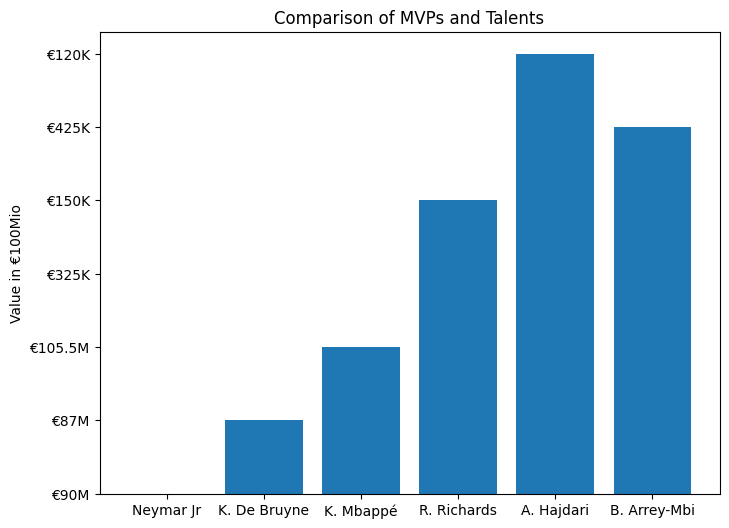

In [16]:
# create a dataframe with 'name' and 'value' columns
df = pd.DataFrame(data_copy, columns=['name', 'value'])

# select the rows for the six specific players you want to plot
players = ['K. Mbappé', 'Neymar Jr', 'K. De Bruyne', 'R. Richards', 'A. Hajdari','B. Arrey-Mbi']
df_players = df[df['name'].isin(players)]

# create a bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(df_players['name'], df_players['value'])
plt.ylabel('Value in €100Mio')
plt.title('Comparison of MVPs and Talents')

# show the chart
plt.show()

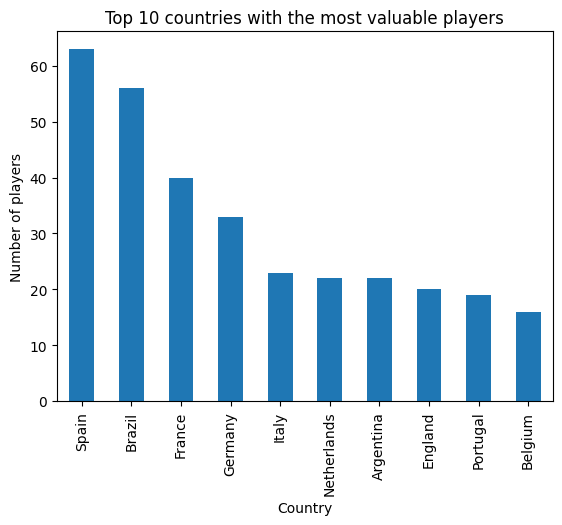

In [17]:
# Group the data by country and count the number of players in each country
mvps_by_country = mvps.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
mvps_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most valuable players')

# Display the chart
plt.show()

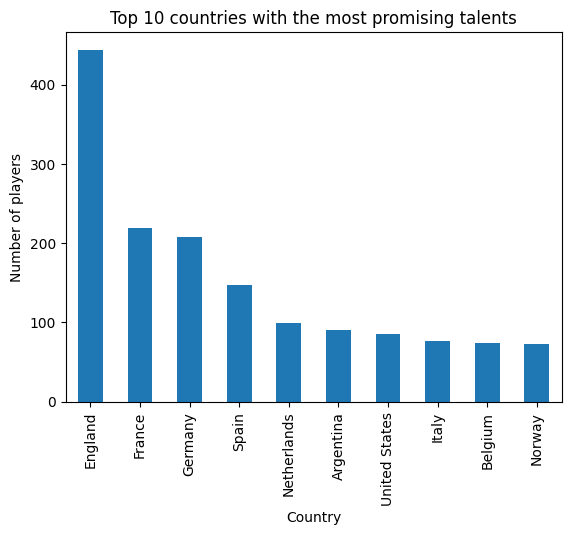

In [18]:
# Group the data by country and count the number of players in each country
talents_by_country = talents.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
talents_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most promising talents')

# Display the chart
plt.show()

## 04 - Processing Data

### Dealing with outliers

In [19]:
X_N.shape

(17125, 22)

In [20]:
# Automatically removing outliers
for column in X_N:
    Q1 = X_N[column].quantile(0.25)
    Q3 = X_N[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_N = X_N[(X_N[column] >= lower_bound) & (X_N[column] <= upper_bound)]

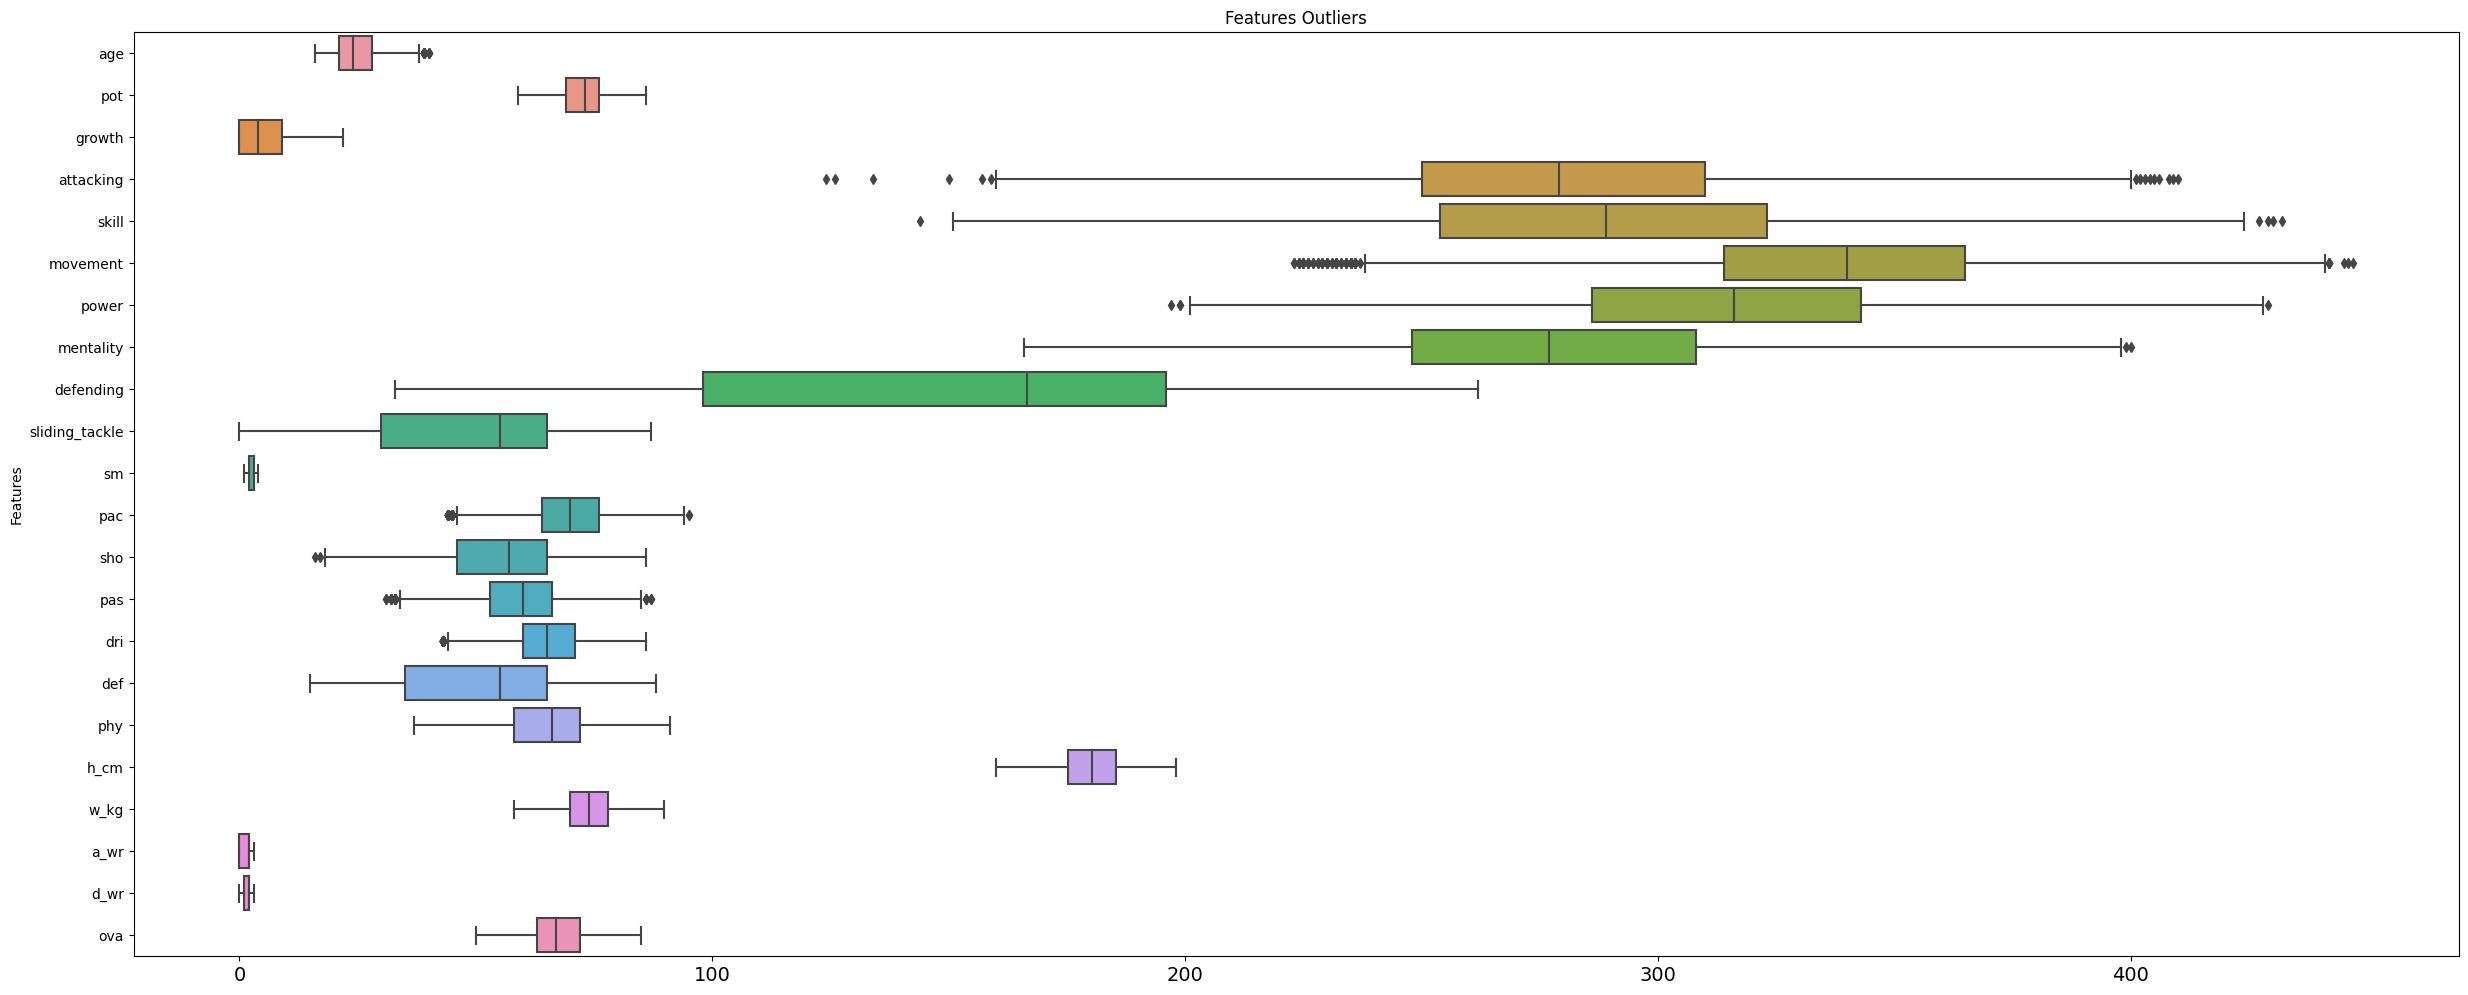

In [21]:
# Visualizing the changes

fig, ax = plt.subplots(figsize=(30, 12))
sns.boxplot(data=X_N, orient="h", ax=ax, showfliers=True, whis=1.5)

# Set the x-axis label
ax.set_ylabel("Features")
# Set the title of the plot
ax.set_title("Features Outliers")
# Adjust the font size of the x-axis ticks
ax.tick_params(axis='x', labelsize=14)
# Show the plot
plt.show()

### Checking normal distributions

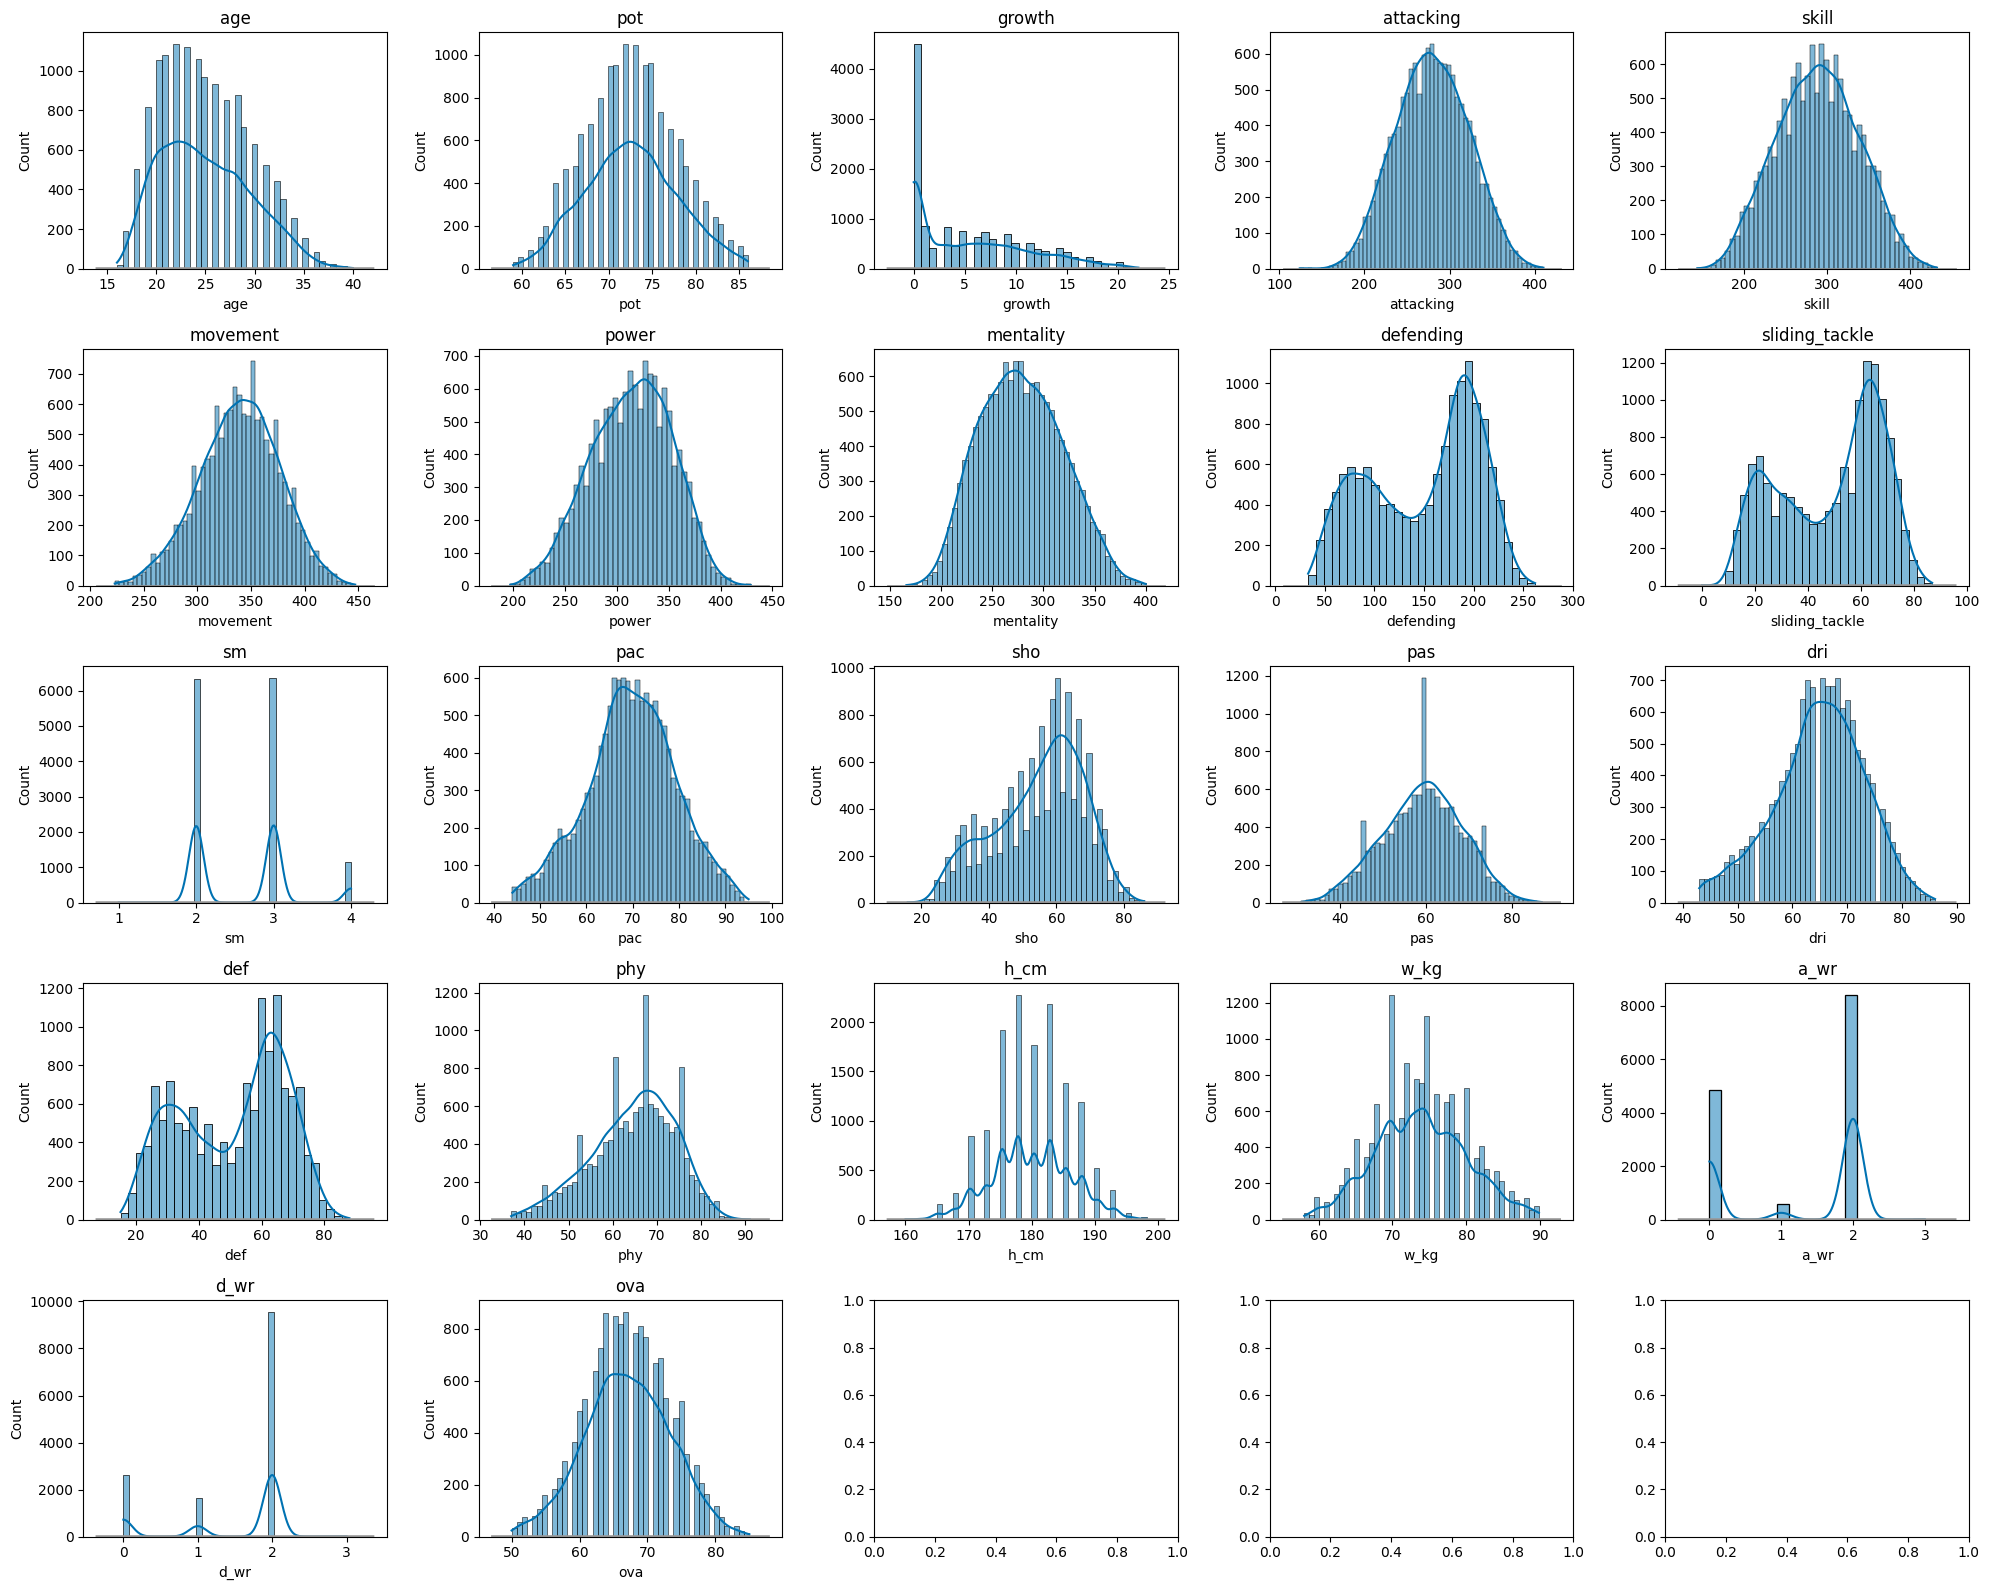

In [22]:
# set color palette
colors = ['#0072B2'] # blue

# plot normalized features in a grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 16)) # nrows to 5, ncols to 6 to plot our 26 features
for i, ax in enumerate(axes.flat):
    if i >= len(X_N.columns):
        break
    sns.histplot(X_N.iloc[:, i], ax=ax, color=colors[i % len(colors)], kde=True)
    sns.kdeplot(X_N.iloc[:, i], ax=ax, color='#999999', linewidth=2)
    ax.set_title(X_N.columns[i])
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

The majority of our features seems to have a bell-shape curve; we will use **MinMaxScaler** for normalization.
<div>

### Dealing with multicollinearity

In [23]:
# Creating the matrix
X_corr = round(X_N.corr(), 4)

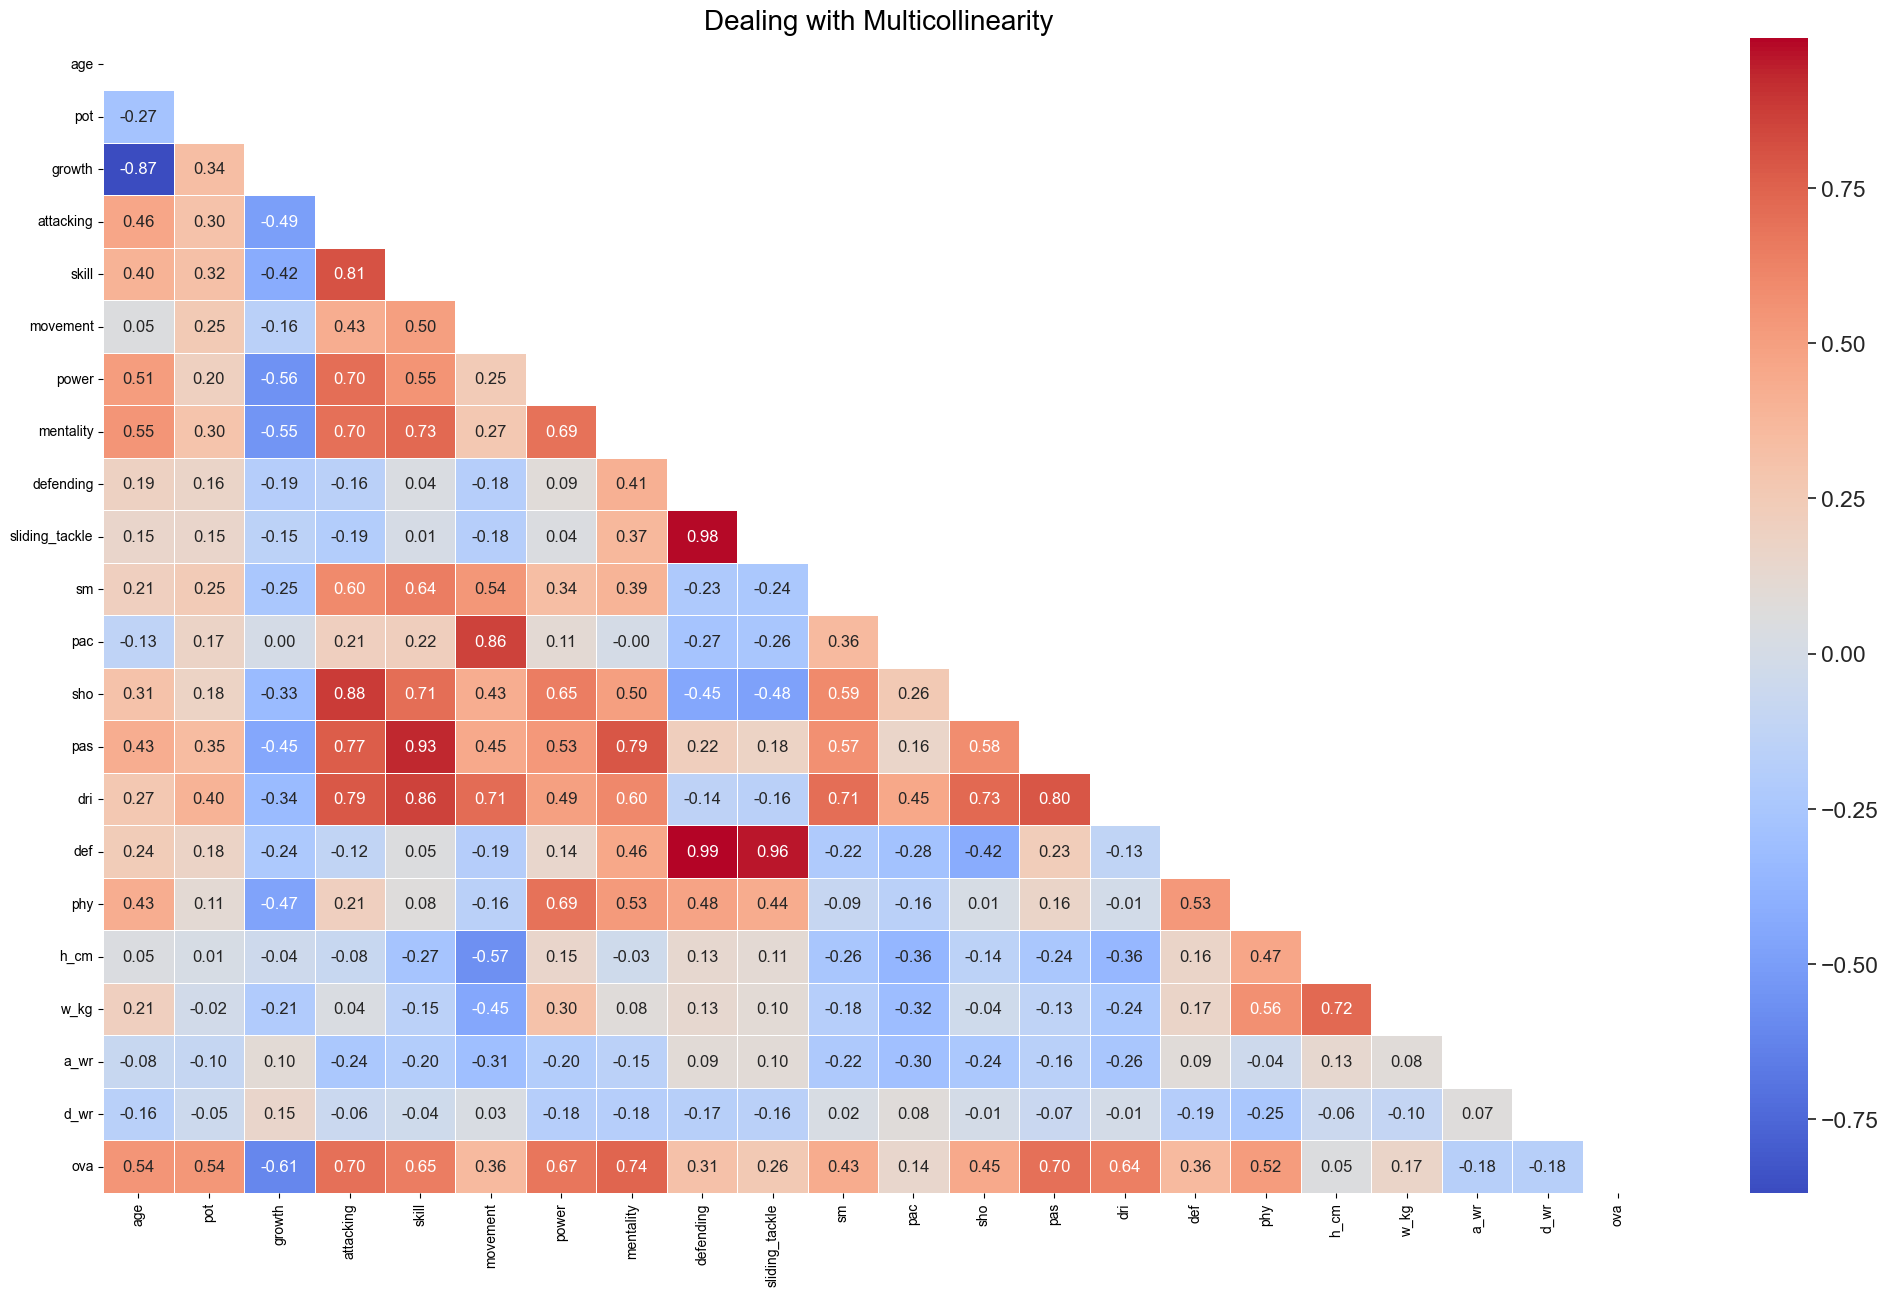

In [24]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(X_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(X_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

<div class="alert alert-block alert-success">
We don't detect any multicollinearity; we proceed.
<div>

### X-Y Split

In [25]:
# We need to be careful about when and how we do the split.
# In this case, we do it now to not normalize our target
Y = X_N['ova']
X = X_N.drop(['ova'], axis=1)

### Normalizing the data

In [26]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

# Making it a dataframe
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)

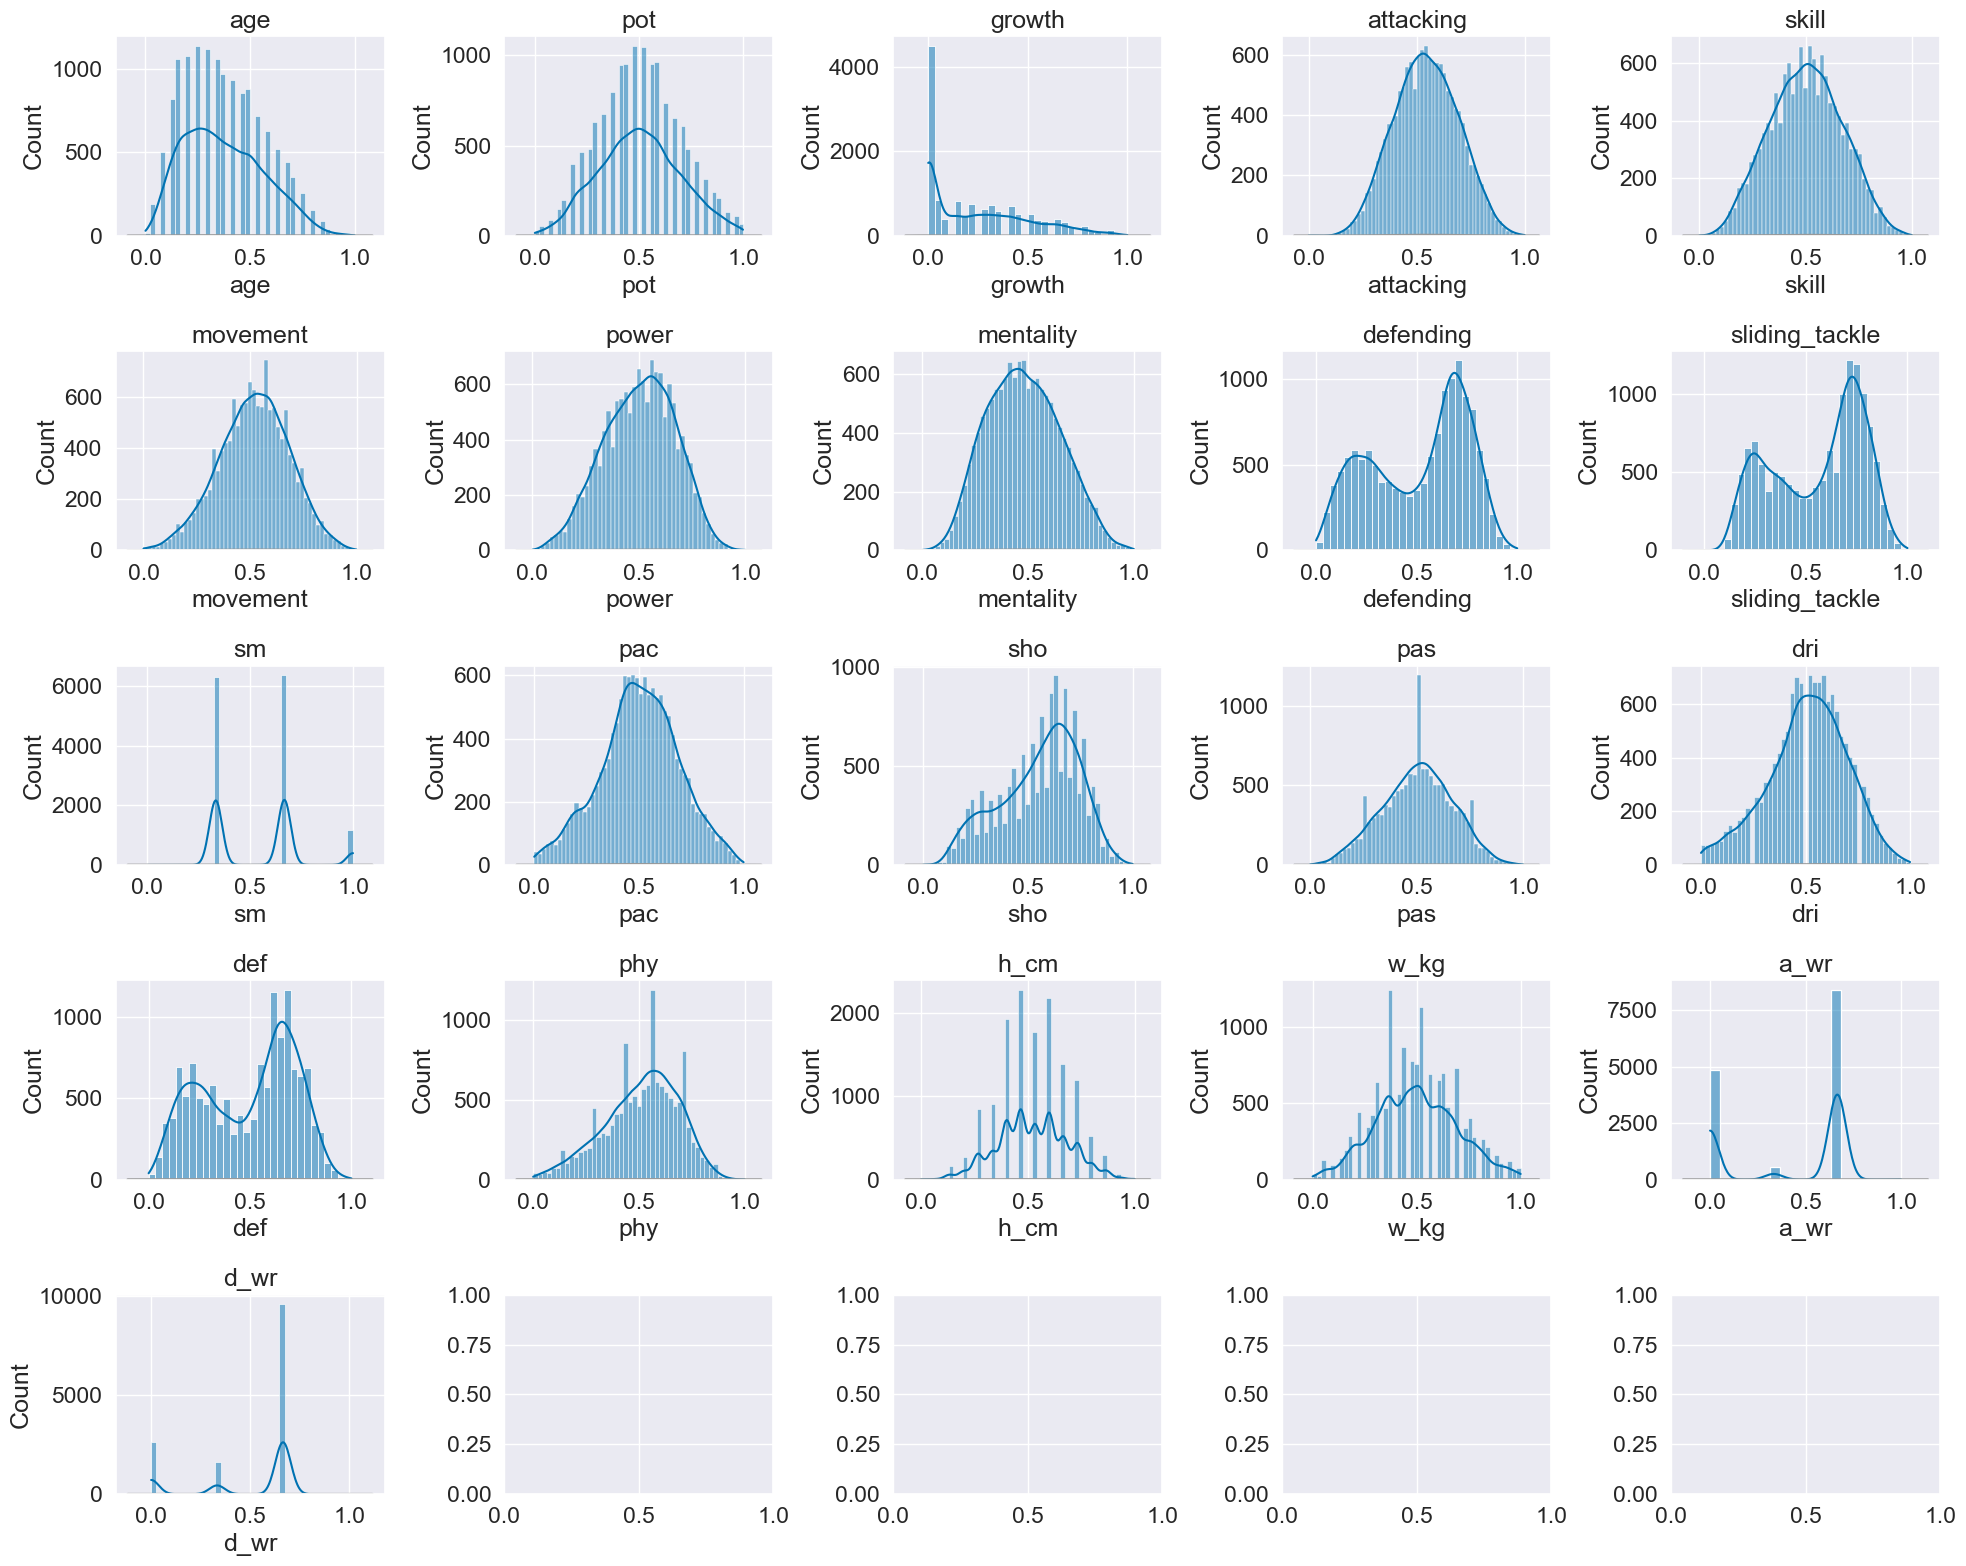

In [27]:
# Checking again their distributions

# set color palette
colors = ['#0072B2'] # blue

# plot normalized features in a grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 16)) # nrows to 5, ncols to 6 to plot our 26 features
for i, ax in enumerate(axes.flat):
    if i >= len(X_minmax.columns):
        break
    sns.histplot(X_minmax.iloc[:, i], ax=ax, color=colors[i % len(colors)], kde=True)
    sns.kdeplot(X_minmax.iloc[:, i], ax=ax, color='#999999', linewidth=2)
    ax.set_title(X_minmax.columns[i])
plt.tight_layout()
plt.show()

## 05 - Modeling

### Train-Test Split

In [28]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [29]:
len(X) # Len before the test

13846

In [30]:
len(X_test) # Len after testing 30% of X data

4154

In [31]:
len(X_train) # Len after training 70% of X data

9692

### ElasticNet (dealing with an overfittedd model)

<div class="alert alert-block alert-info">

* Our model **is** overfitted (see previous versions in [iron-labs](https://github.com/isi-mube/iron-labs/tree/main/project-mbappe) with an expected Linear Regression result of `1.0` if done perfectly, as it is not real-world data.
* We will use [ElasticNet](https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html) as our linear regression method, that combines regularization techniques from Lasso and Ridge to make it slighlty more realistic (in term of results)
* We chose ElasticNet because in <b>v1</b> provided the most realistic model (balanced between overfitting and underfitting). 
</div>

<table class="GeneratedTable">
  <thead>
    <tr>
      <th>Results</th>
      <th>LinearRegression</th>
      <th>Lasso</th>
      <th>Ridge</th>
      <th>ElasticNet</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>R2</b></td>
      <td>1.0</td>
      <td>0.9902</td>
      <td>1.0</td>
      <td>0.9908</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>0.0</td>
      <td>0.5643</td>
      <td>0.0001</td>
      <td>0.5464</td>
    </tr>
    <tr>
      <td><b>MSE</b></td>
      <td>0.0</td>
      <td>0.3184</td>
      <td>0.0</td>
      <td>0.2985</td>
    </tr>
    <tr>
      <td><b>MAE</b></td>
      <td>0.0</td>
      <td>0.4446</td>
      <td>0.0001</td>
      <td>0.4291</td>
    </tr>
  </tbody>
</table>

In [32]:
# Settings
alpha = 1.0
l1_ratio = 0.5
elasticnet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Train data for the model
elasticnet.fit(X_train, y_train)

# Predictions
predictions = elasticnet.predict(X_test)

r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("The value of the metric MSE is ", round(MSE_3, 4))
print("MAE = ", round(MAE_3, 4))

R2 =  0.9933
RMSE =  0.5205
The value of the metric MSE is  0.2709
MAE =  0.4092


<div class="alert alert-block alert-success">

The results show **slight improvements** across all metrics in the updated model compared to the previous one.

* R2 increased from 0.9908 to 0.9933, a 0.0025 improvement. The updated model now explains 99.33% of the variance in the target variable, up from 99.08%.
* RMSE decreased by 0.0259, from 0.5464 to 0.5205, indicating better performance in the updated model.
* MSE decreased by 0.0276, from 0.2985 to 0.2709, suggesting improved model performance.
* MAE decreased by 0.0199, from 0.4291 to 0.4092, meaning the updated model has fewer errors in its predictions.
</div>

## 06 - Reporting

### Presenting the results

In [33]:
# Dataframe for true, predicted and absolute difference values
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)

# Scale the true and predicted values to be between 0 and 1
results['true_scaled'] = (results['true'] - results['true'].min()) / (results['true'].max() - results['true'].min())
results['pred_scaled'] = (results['pred'] - results['pred'].min()) / (results['pred'].max() - results['pred'].min())

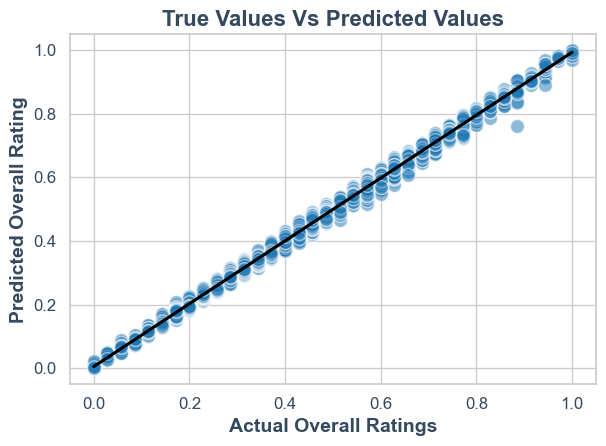

In [34]:
sns.set_style('whitegrid')
sns.regplot(x='true_scaled', y='pred_scaled', data=results, color='black', scatter_kws={'s': 100, 'color': '#1f77b4', 'alpha': 0.5, 'edgecolor': 'w'})
plt.xlabel('Actual Overall Ratings', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Predicted Overall Rating', fontsize=14, fontweight='bold', color='#34495e')
plt.title('True Values Vs Predicted Values', fontsize=16, fontweight='bold', color='#34495e')
plt.xticks(fontsize=12, color='#34495e')
plt.yticks(fontsize=12, color='#34495e')
plt.tight_layout()
plt.show()

[Old Presentation](https://docs.google.com/presentation/d/1Td9rJDfuB_epbsVk1nrdaiT-oH_MAjnKdBoWULncyT0/edit#slide=id.gc6f9e470d_0_126)